# ECNU学科数据分析报告

本报告基于 ESI 网站爬取的全球大学学科数据，对华东师范大学（East China Normal University, ECNU）各学科的表现进行统计分析和可视化评估。

**分析流程：**
1. 自动读取 downloads 文件夹下所有学科 csv 数据。
2. 筛选出 ECNU 相关数据，统计各学科主要指标（如排名、论文数、分数等）。
3. 对比各学科表现，生成可视化图表。
4. 总结 ECNU 学科优势与不足，提出建议。

---

#### 代码块1：导入必要的库

In [17]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Optional

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

print("库导入完成！")

库导入完成！


#### 代码块2: 定义数据提取函数

In [18]:
def extract_research_field(first_line: str) -> Optional[str]:
    """从第一行提取研究领域"""
    if "Filter Value(s):" in first_line:
        start_idx = first_line.find("Filter Value(s):") + len("Filter Value(s):")
        end_idx = first_line.find(",", start_idx)
        if end_idx == -1:
            end_idx = len(first_line)
        field = first_line[start_idx:end_idx].strip()
        return field
    return None

def process_csv_file(file_path: str) -> Optional[Dict]:
    """处理单个CSV文件，提取ECNU数据"""
    try:
        # 读取第一行获取研究领域
        with open(file_path, 'r', encoding='utf-8') as f:
            first_line = f.readline().strip()
        
        research_field = extract_research_field(first_line)
        if not research_field:
            print(f"警告: 无法从文件 {file_path} 提取研究领域")
            return None
        
        # 读取数据部分（跳过第一行）
        df = pd.read_csv(file_path, skiprows=1)
        
        # 查找ECNU数据
        ecnu_data = df[df['Institutions'] == 'EAST CHINA NORMAL UNIVERSITY']
        
        if ecnu_data.empty:
            print(f"信息: 在 {research_field} 领域未找到ECNU数据")
            return None
        
        # 提取ECNU数据
        ecnu_row = ecnu_data.iloc[0]
        result = {
            'research_field': research_field,
            'institution': ecnu_row['Institutions'],
            'country_region': ecnu_row['Countries/Regions'],
            'web_of_science_documents': ecnu_row['Web of Science Documents'],
            'cites': ecnu_row['Cites'],
            'cites_per_paper': ecnu_row['Cites/Paper'],
            'top_papers': ecnu_row['Top Papers'],
            'file_name': os.path.basename(file_path)
        }
        
        print(f"找到ECNU在 {research_field} 领域的数据")
        return result
        
    except Exception as e:
        print(f"错误: 处理文件 {file_path} 时出错: {e}")
        return None

print("数据提取函数定义完成！")

数据提取函数定义完成！


#### 代码块3: 提取所有ECNU数据

In [19]:
# 查找所有CSV文件
csv_files = glob.glob("downloads/*.csv")
print(f"找到 {len(csv_files)} 个CSV文件")

# 处理所有文件
ecnu_results = []
for csv_file in sorted(csv_files):
    result = process_csv_file(csv_file)
    if result:
        ecnu_results.append(result)

print(f"\n总共找到 {len(ecnu_results)} 个包含ECNU数据的文件")

# 转换为DataFrame
ecnu_df = pd.DataFrame(ecnu_results)
print("\nECNU数据提取完成！")

找到 22 个CSV文件
找到ECNU在 AGRICULTURAL SCIENCES   Show: Top 领域的数据
信息: 在 IMMUNOLOGY   Show: Top 领域未找到ECNU数据
找到ECNU在 MATERIALS SCIENCE   Show: Top 领域的数据
找到ECNU在 MATHEMATICS   Show: Top 领域的数据
信息: 在 MICROBIOLOGY   Show: Top 领域未找到ECNU数据
找到ECNU在 MOLECULAR BIOLOGY & GENETICS   Show: Top 领域的数据
信息: 在 MULTIDISCIPLINARY   Show: Top 领域未找到ECNU数据
找到ECNU在 NEUROSCIENCE & BEHAVIOR   Show: Top 领域的数据
找到ECNU在 PHARMACOLOGY & TOXICOLOGY   Show: Top 领域的数据
找到ECNU在 PHYSICS   Show: Top 领域的数据
找到ECNU在 PLANT & ANIMAL SCIENCE   Show: Top 领域的数据
找到ECNU在 BIOLOGY & BIOCHEMISTRY   Show: Top 领域的数据
找到ECNU在 PSYCHIATRY/PSYCHOLOGY   Show: Top 领域的数据
找到ECNU在 SOCIAL SCIENCES 领域的数据
信息: 在 SPACE SCIENCE   Show: Top 领域未找到ECNU数据
找到ECNU在 CHEMISTRY   Show: Top 领域的数据
找到ECNU在 CLINICAL MEDICINE   Show: Top 领域的数据
找到ECNU在 COMPUTER SCIENCE   Show: Top 领域的数据
信息: 在 ECONOMICS & BUSINESS   Show: Top 领域未找到ECNU数据
找到ECNU在 ENGINEERING   Show: Top 领域的数据
找到ECNU在 ENVIRONMENT/ECOLOGY   Show: Top 领域的数据
找到ECNU在 GEOSCIENCES   Show: Top 领域的数据

总共找到 17 个包含ECNU数据

#### 代码块4: 数据概览和基本信息

In [20]:
print("ECNU数据概览:")
print("=" * 50)
print(f"数据行数: {len(ecnu_df)}")
print(f"研究领域数量: {ecnu_df['research_field'].nunique()}")
print("\n数据列:")
print(ecnu_df.columns.tolist())
print("\n前5行数据:")
print(ecnu_df.head())

print("\n基本统计信息:")
print(ecnu_df.describe())

print("\n所有研究领域:")
for i, field in enumerate(ecnu_df['research_field'].unique(), 1):
    print(f"{i}. {field}")

ECNU数据概览:
数据行数: 17
研究领域数量: 17

数据列:
['research_field', 'institution', 'country_region', 'web_of_science_documents', 'cites', 'cites_per_paper', 'top_papers', 'file_name']

前5行数据:
                             research_field                   institution  \
0         AGRICULTURAL SCIENCES   Show: Top  EAST CHINA NORMAL UNIVERSITY   
1             MATERIALS SCIENCE   Show: Top  EAST CHINA NORMAL UNIVERSITY   
2                   MATHEMATICS   Show: Top  EAST CHINA NORMAL UNIVERSITY   
3  MOLECULAR BIOLOGY & GENETICS   Show: Top  EAST CHINA NORMAL UNIVERSITY   
4       NEUROSCIENCE & BEHAVIOR   Show: Top  EAST CHINA NORMAL UNIVERSITY   

   country_region  web_of_science_documents    cites  cites_per_paper  \
0  CHINA MAINLAND                     346.0   6513.0            18.82   
1  CHINA MAINLAND                    2720.0  93969.0            34.55   
2  CHINA MAINLAND                    2019.0  11984.0             5.94   
3  CHINA MAINLAND                     532.0  20568.0            38

#### 代码块5: 数据可视化 - 各领域引用次数

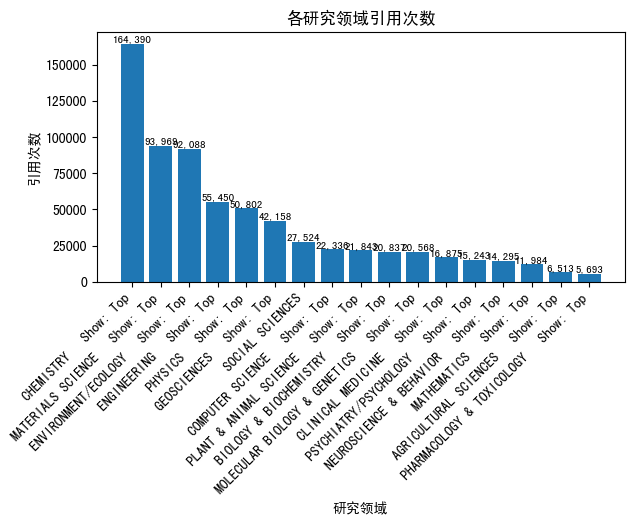

In [21]:
plt.figure(figsize=(12, 8))
sorted_df = ecnu_df.sort_values('cites', ascending=False)

# 创建条形图
plt.subplot(2, 2, 1)
bars = plt.bar(range(len(sorted_df)), sorted_df['cites'])
plt.title('各研究领域引用次数')
plt.xlabel('研究领域')
plt.ylabel('引用次数')
plt.xticks(range(len(sorted_df)), sorted_df['research_field'], rotation=45, ha='right')

# 在条形上添加数值标签
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


#### 代码块6: 数据可视化 - 多指标对比

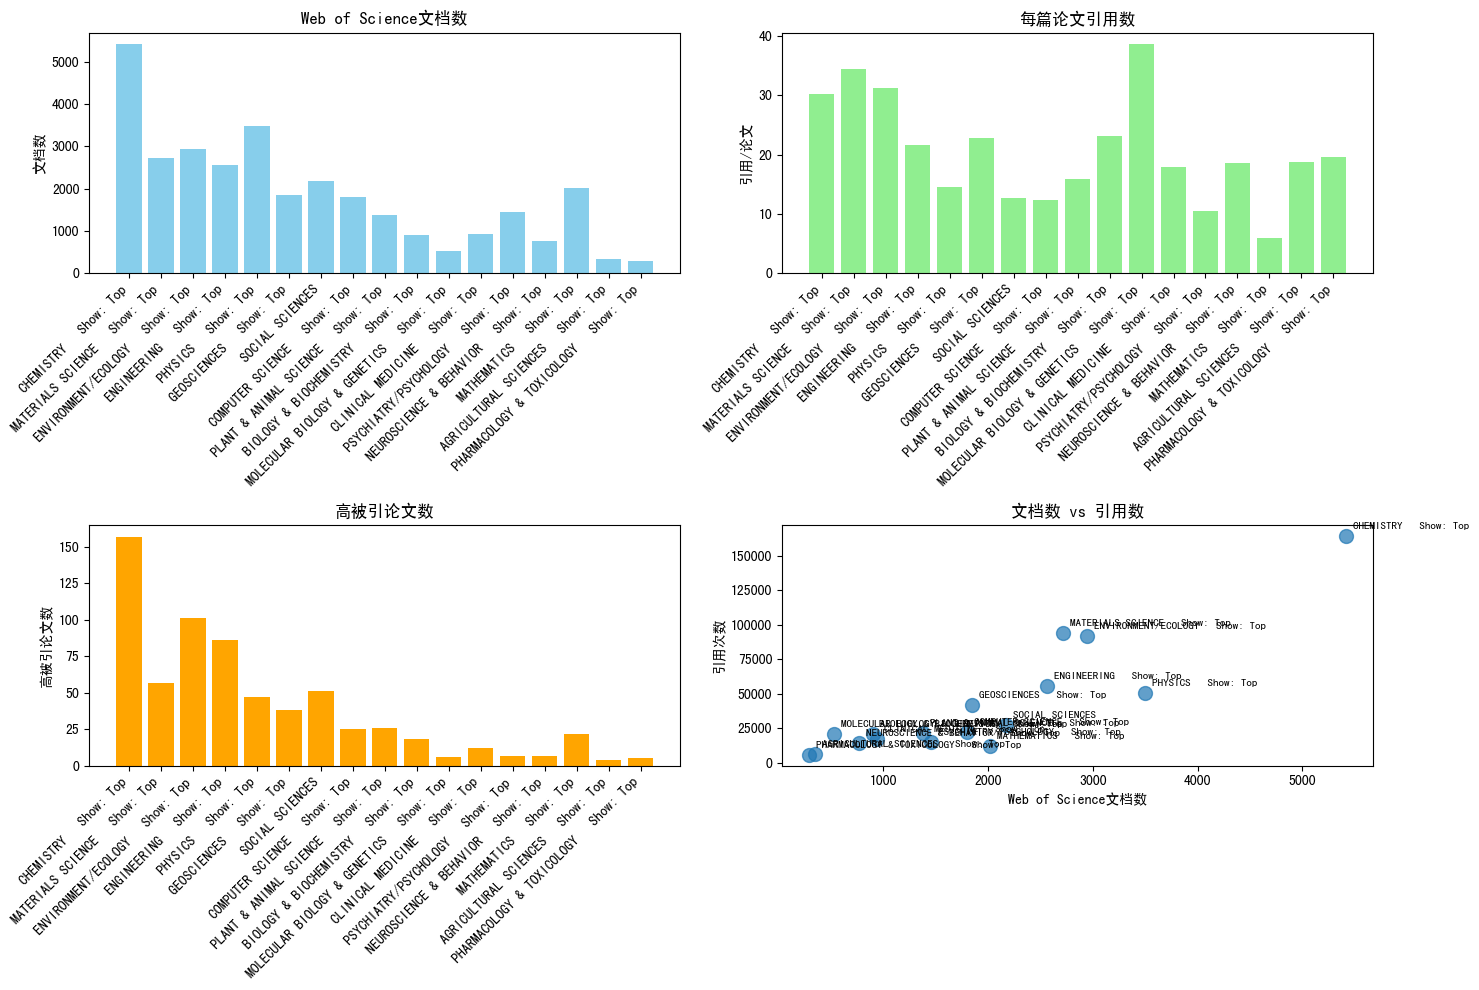

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Web of Science文档数
axes[0, 0].bar(range(len(sorted_df)), sorted_df['web_of_science_documents'], color='skyblue')
axes[0, 0].set_title('Web of Science文档数')
axes[0, 0].set_ylabel('文档数')
axes[0, 0].set_xticks(range(len(sorted_df)))
axes[0, 0].set_xticklabels(sorted_df['research_field'], rotation=45, ha='right')

# 2. 每篇论文引用数
axes[0, 1].bar(range(len(sorted_df)), sorted_df['cites_per_paper'], color='lightgreen')
axes[0, 1].set_title('每篇论文引用数')
axes[0, 1].set_ylabel('引用/论文')
axes[0, 1].set_xticks(range(len(sorted_df)))
axes[0, 1].set_xticklabels(sorted_df['research_field'], rotation=45, ha='right')

# 3. 高被引论文数
axes[1, 0].bar(range(len(sorted_df)), sorted_df['top_papers'], color='orange')
axes[1, 0].set_title('高被引论文数')
axes[1, 0].set_ylabel('高被引论文数')
axes[1, 0].set_xticks(range(len(sorted_df)))
axes[1, 0].set_xticklabels(sorted_df['research_field'], rotation=45, ha='right')

# 4. 散点图：文档数 vs 引用数
axes[1, 1].scatter(ecnu_df['web_of_science_documents'], ecnu_df['cites'], alpha=0.7, s=100)
axes[1, 1].set_title('文档数 vs 引用数')
axes[1, 1].set_xlabel('Web of Science文档数')
axes[1, 1].set_ylabel('引用次数')

# 添加数据点标签
for i, row in ecnu_df.iterrows():
    axes[1, 1].annotate(row['research_field'], 
                       (row['web_of_science_documents'], row['cites']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

#### 代码块7: 相关性分析和热力图

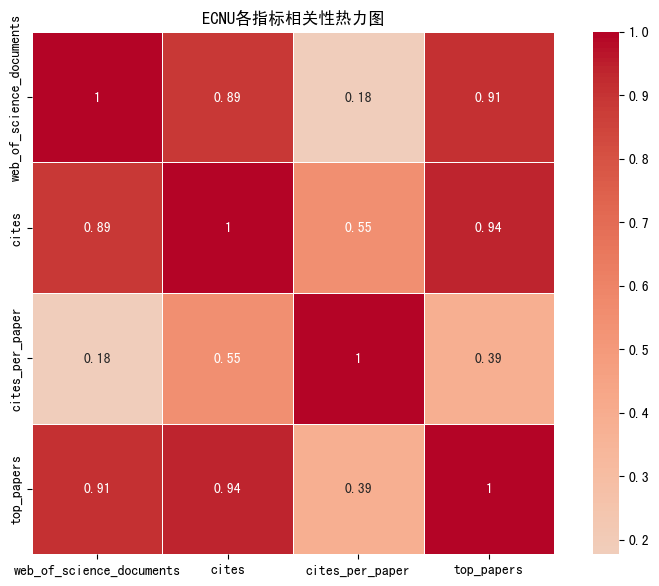

相关性矩阵:
                          web_of_science_documents     cites  cites_per_paper  \
web_of_science_documents                  1.000000  0.890438         0.177304   
cites                                     0.890438  1.000000         0.550559   
cites_per_paper                           0.177304  0.550559         1.000000   
top_papers                                0.909858  0.937161         0.386408   

                          top_papers  
web_of_science_documents    0.909858  
cites                       0.937161  
cites_per_paper             0.386408  
top_papers                  1.000000  


In [23]:
# 选择数值列进行相关性分析
numeric_cols = ['web_of_science_documents', 'cites', 'cites_per_paper', 'top_papers']
correlation_matrix = ecnu_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('ECNU各指标相关性热力图')
plt.tight_layout()
plt.show()

print("相关性矩阵:")
print(correlation_matrix)

#### 代码块8: 排名分析

In [24]:
print("ECNU在各研究领域的表现排名:")
print("=" * 60)

# 按引用次数排名
print("\n按引用次数排名:")
cites_ranking = ecnu_df.sort_values('cites', ascending=False)
for i, (idx, row) in enumerate(cites_ranking.iterrows(), 1):
    print(f"{i}. {row['research_field']}: {row['cites']:,} 次引用")

# 按每篇论文引用数排名
print("\n按每篇论文引用数排名:")
cites_per_paper_ranking = ecnu_df.sort_values('cites_per_paper', ascending=False)
for i, (idx, row) in enumerate(cites_per_paper_ranking.iterrows(), 1):
    print(f"{i}. {row['research_field']}: {row['cites_per_paper']:.2f} 引用/论文")

# 按高被引论文数排名
print("\n按高被引论文数排名:")
top_papers_ranking = ecnu_df.sort_values('top_papers', ascending=False)
for i, (idx, row) in enumerate(top_papers_ranking.iterrows(), 1):
    print(f"{i}. {row['research_field']}: {row['top_papers']} 篇高被引论文")

ECNU在各研究领域的表现排名:

按引用次数排名:
1. CHEMISTRY   Show: Top: 164,390.0 次引用
2. MATERIALS SCIENCE   Show: Top: 93,969.0 次引用
3. ENVIRONMENT/ECOLOGY   Show: Top: 92,088.0 次引用
4. ENGINEERING   Show: Top: 55,450.0 次引用
5. PHYSICS   Show: Top: 50,802.0 次引用
6. GEOSCIENCES   Show: Top: 42,158.0 次引用
7. SOCIAL SCIENCES: 27,524.0 次引用
8. COMPUTER SCIENCE   Show: Top: 22,336.0 次引用
9. PLANT & ANIMAL SCIENCE   Show: Top: 21,843.0 次引用
10. BIOLOGY & BIOCHEMISTRY   Show: Top: 20,837.0 次引用
11. MOLECULAR BIOLOGY & GENETICS   Show: Top: 20,568.0 次引用
12. CLINICAL MEDICINE   Show: Top: 16,875.0 次引用
13. PSYCHIATRY/PSYCHOLOGY   Show: Top: 15,243.0 次引用
14. NEUROSCIENCE & BEHAVIOR   Show: Top: 14,295.0 次引用
15. MATHEMATICS   Show: Top: 11,984.0 次引用
16. AGRICULTURAL SCIENCES   Show: Top: 6,513.0 次引用
17. PHARMACOLOGY & TOXICOLOGY   Show: Top: 5,693.0 次引用

按每篇论文引用数排名:
1. MOLECULAR BIOLOGY & GENETICS   Show: Top: 38.66 引用/论文
2. MATERIALS SCIENCE   Show: Top: 34.55 引用/论文
3. ENVIRONMENT/ECOLOGY   Show: Top: 31.31 引用/论文
4. CHEMIS

#### 代码块9: 总结统计

In [25]:
print("ECNU总体表现总结:")
print("=" * 50)

total_docs = ecnu_df['web_of_science_documents'].sum()
total_cites = ecnu_df['cites'].sum()
avg_cites_per_paper = ecnu_df['cites_per_paper'].mean()
total_top_papers = ecnu_df['top_papers'].sum()

print(f"总Web of Science文档数: {total_docs:,}")
print(f"总引用次数: {total_cites:,}")
print(f"平均每篇论文引用数: {avg_cites_per_paper:.2f}")
print(f"总高被引论文数: {total_top_papers}")

# 找出表现最好的领域
best_cites_field = ecnu_df.loc[ecnu_df['cites'].idxmax()]
best_cites_per_paper_field = ecnu_df.loc[ecnu_df['cites_per_paper'].idxmax()]
best_top_papers_field = ecnu_df.loc[ecnu_df['top_papers'].idxmax()]

print(f"\n表现最好的领域:")
print(f"- 引用次数最多: {best_cites_field['research_field']} ({best_cites_field['cites']:,} 次引用)")
print(f"- 每篇论文引用数最高: {best_cites_per_paper_field['research_field']} ({best_cites_per_paper_field['cites_per_paper']:.2f} 引用/论文)")
print(f"- 高被引论文最多: {best_top_papers_field['research_field']} ({best_top_papers_field['top_papers']} 篇高被引论文)")

ECNU总体表现总结:
总Web of Science文档数: 31,601.0
总引用次数: 682,568.0
平均每篇论文引用数: 20.55
总高被引论文数: 669.0

表现最好的领域:
- 引用次数最多: CHEMISTRY   Show: Top (164,390.0 次引用)
- 每篇论文引用数最高: MOLECULAR BIOLOGY & GENETICS   Show: Top (38.66 引用/论文)
- 高被引论文最多: CHEMISTRY   Show: Top (157.0 篇高被引论文)


#### 代码块10: 保存分析结果

In [26]:
# 保存处理后的数据
ecnu_df.to_csv('ecnu_analysis_results.csv', index=False, encoding='utf-8')
print("分析结果已保存到 'ecnu_analysis_results.csv'")

# 创建详细报告
report_df = ecnu_df.copy()
report_df['排名_引用次数'] = report_df['cites'].rank(ascending=False).astype(int)
report_df['排名_每篇论文引用数'] = report_df['cites_per_paper'].rank(ascending=False).astype(int)
report_df['排名_高被引论文数'] = report_df['top_papers'].rank(ascending=False).astype(int)

report_df.to_csv('ecnu_detailed_report.csv', index=False, encoding='utf-8')
print("详细报告已保存到 'ecnu_detailed_report.csv'")

print("\n所有分析完成！")

分析结果已保存到 'ecnu_analysis_results.csv'
详细报告已保存到 'ecnu_detailed_report.csv'

所有分析完成！
